# Lista 4

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from types import FunctionType

## Zadanie 1

**Metoda bisekcji**

In [3]:
# Metoda bisekcji 
def bisection(f: FunctionType, a: float, b: float, eps: float, max_iter: int):
    for count in range(max_iter):
        diff = (b - a) / 2
        c = a + diff # Lepsze niż (a + b) / 2 w arytmetyce zmiennoprzecinkowej
        if np.abs(f(c)) < eps:
            return c, count
        if np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    return c, max_iter

**Metoda Brenta**

In [4]:
# Metoda Brenth'a
def brent(f: FunctionType, a: float, b: float, eps: float, max_iter: int):
    fa = f(a)
    fb = f(b)
    if fa * fb >= 0:
        raise ValueError("f(a) i f(b) muszą mieć różne znaki")
    if abs(fa) < abs(fb):
        a, b = b, a
        fa, fb = fb, fa
    c = a
    fc = fa
    mflag = True
    s = 0
    for count in range(max_iter):
        if fa != fc and fb != fc:
            s = a * fb * fc / ((fa - fb) * (fa - fc)) + b * fa * fc / ((fb - fa) * (fb - fc)) + c * fa * fb / ((fc - fa) * (fc - fb))
        else:
            s = b - fb * (b - a) / (fb - fa)
        if (s < (3 * a + b) / 4 or s > b) or (mflag and abs(s - b) >= abs(b - c) / 2) or (not mflag and abs(s - b) >= abs(c - d) / 2) or (mflag and abs(b - c) < eps) or (not mflag and abs(c - d) < eps):
            s = (a + b) / 2
            mflag = True
        else:
            mflag = False
        fs = f(s)
        d = c
        c = b
        fc = fb
        if fa * fs < 0:
            b = s
            fb = fs
        else:
            a = s
            fa = fs
        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa
        if abs(fb) < eps:
            
            return b, count
    return b, max_iter


def brent_v2(f: FunctionType, a: float, b:float, eps: float, max_iter: int):

    for count in range(max_iter): 
        fa = f(a)
        fb = f(b)
        diff = (b - a) / 2

        c = a + diff
        fc = f(c)
        
        fabdiff = fa - fb
        fcadiff = fc - fa
        fbcdiff = fb - fc 

        x = (a * fb * fc * fbcdiff + b * fa * fc * fcadiff + c * fa * fb * fabdiff) / (fabdiff * fcadiff * fbcdiff)

        if np.abs(f(x)) < eps:
            return x, count 

        if (np.sign(fc) != np.sign(fa) and a <= x <= c):
            b = x
        elif (np.sign(fc) != np.sign(fb) and c <= x <= b):
            a = x
        else:
            if np.sign(fa) == np.sign(fc):
                a = c
            else:
                b = c
        
    return x, max_iter

**Metoda siecznych**

In [5]:
# Metoda siecznych 
def secant(f: FunctionType, a: float, b: float, eps: float, max_iter: int):
    for count in range(max_iter):
        c = b - f(b) * (b - a) / (f(b) - f(a))
        if np.abs(f(c)) < eps:
            return c, count
        if np.sign(f(c)) == np.sign(f(b)):
            b = c
        else: 
            a = c
    return c, max_iter

**Metoda Newtona**

In [6]:
# Metoda Newtona
def newton(f: FunctionType, fprime: FunctionType, x0: float, eps: float, max_iter: int):
    for count in range(max_iter):
        x1 = x0 - f(x0) / fprime(x0)
        if np.abs(x1 - x0) < eps:
            return x1, count
        x0 = x1
    return x1, max_iter

### Wyniki

In [9]:
def f(x):
    return np.tan(np.pi - x) - x

def fprime(x):
    return -1 / np.cos(np.pi - x) ** 2 - 1

In [10]:
    bi_sol, bi_count = bisection(f, -1, 1.1, 1e-16, 1000)
    print(f"Rozwiązanie metodą bisekcji: {bi_sol}")
    print(f"Ilość iteracji: {bi_count}")
    print("=============================================")

    br_sol, br_count = brent(f, -1, 1.1, 1e-16, 1000)
    print(f"Rozwiązanie metodą brent'a: {br_sol}")
    print(f"Ilość iteracji: {br_count}")
    print("=============================================")

    se_sol, se_count = secant(f, -1, 1.1, 1e-16, 1000)
    print(f"Rozwiązanie metodą siecznych: {se_sol}")
    print(f"Ilość iteracji: {se_count}")
    print("=============================================")

    ne_sol, ne_count = newton(f, fprime, 1.1, 1e-16, 1000)
    print(f"Rozwiązanie metodą newtona: {ne_sol}")
    print(f"Ilość iteracji: {ne_count}")
    print("=============================================")

Rozwiązanie metodą bisekcji: -1.2979035835498855e-16
Ilość iteracji: 53
Rozwiązanie metodą brent'a: -4.916566766217853e-17
Ilość iteracji: 6
Rozwiązanie metodą siecznych: -2.220446049250313e-16
Ilość iteracji: 26
Rozwiązanie metodą newtona: -1.0895518733880561e-16
Ilość iteracji: 5


## Zadanie 2

In [14]:
def g(x):
    return np.cosh(x) * np.cos(x) - 1

def gprime(x):
    return np.sinh(x) * np.cos(x) - np.cosh(x) * np.sin(x)

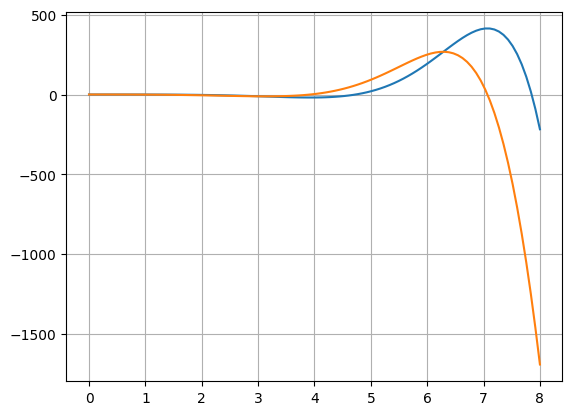

In [15]:
x = np.linspace(0, 8, 100)
plt.plot(x, g(x))
plt.plot(x, gprime(x))
plt.grid()
plt.show()